#Mandatory assignment 1 


#Haberman Survival data EDA

#Objective
Our aim is  predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes.

Data : The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970  and displays  the survival of patients who had undergone surgery for breast cancer

Attribute information:

age   - Persons age at time of operation.

year  - Year of operation for the patient (egs if it was 1962,we take it as 62)

nodes - Number of positive lymph nodes

status

1 if patient survived 5 years or more after operation

   2 if patient died within 5 years of operation

         

                
            

                 

     


#Loading necessary packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pyl

In [0]:
cancer_df = pd.read_csv('haberman.csv')  #loading haberman dataset


In [3]:
print(cancer_df.head())  #printing the the first 5 rows

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [5]:
print(cancer_df.shape)    # There are 306 data points and 4 features in dataset
print(cancer_df.columns)  #list of various columns

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [7]:
print(cancer_df["status"].value_counts())

1    225
2     81
Name: status, dtype: int64


# Observations

1.   There are 306 data points and 4 features in our dataset
2.   There are two classes {1,2} with datapoints 225 and 81 respectively.

1.   The status feature needs to be converted to categorical feature instead of being a numerical feature

1.   Not a balanced dataset

1.   The values of 'status' column are not meanigful. Hence they are mapped to 'yes' (survived after 5 years) and 'no' (not survived after 5 years)






















In [8]:
# modify the target column values to be meaningful as well as categorical
cancer_df['status'] = cancer_df['status'].map({1:"yes", 2:"no"})
cancer_df['status'] = cancer_df['status'].astype('category')
print(cancer_df.head())

   age  year  nodes status
0   30    64      1    yes
1   30    62      3    yes
2   30    65      0    yes
3   31    59      2    yes
4   31    65      4    yes


In [9]:
print(cancer_df.info())  # Now we can see our update of target variable is successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


# High level statistics

In [10]:
print(cancer_df.describe())

              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


In [11]:
print("Number of rows: " + str(cancer_df.shape[0]))
print("Number of columns: " + str(cancer_df.shape[1]))
print("Columns: " + ", ".join(cancer_df.columns))

print("Target variable distribution")
print(cancer_df.iloc[:,-1].value_counts())
print("*"*50)
print(cancer_df.iloc[:,-1].value_counts(normalize = True))

Number of rows: 306
Number of columns: 4
Columns: age, year, nodes, status
Target variable distribution
yes    225
no      81
Name: status, dtype: int64
**************************************************
yes    0.735294
no     0.264706
Name: status, dtype: float64


#Observations regarding statistics

1.The age of the patients vary from 30 to 83 with the median of 52.

2.Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes.About 50 % of the patients have 1 positive lymph node



3.The dataset contains only a small number of records (306).

4.The target column is imbalanced with 73% of values are 'yes'






In [0]:
survived_patient = cancer_df.loc[cancer_df["status"] == "yes"];  # denote those patient that survived more than 5 years
not_survived_patient=cancer_df.loc[cancer_df["status"] == "no"];  #denote those patient that died within 5 years

In [32]:
survived_patient.describe()




,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


# observations about survived patient

1.225 people have survived treatment in the age group between 30 and 77.

2.50% of people are aged less than 52 years of age and 75% people are below 60 years.

3.75% of successful operations were conducted before the year1966 and 75% of survived patients had 3 or less than 3 nodes





In [33]:
not_survived_patient.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


# observations about not survived patients

1.81 people did not survive and they were in the age group between 34 and 83

2.fifty percent people are less than 53 years and 75% patients were less than 61 years old.

3.75% of unsuccessful operations were conducted before 1965

4.75 % patients who died had nodes in the range 4-11

# Univariate analysis

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


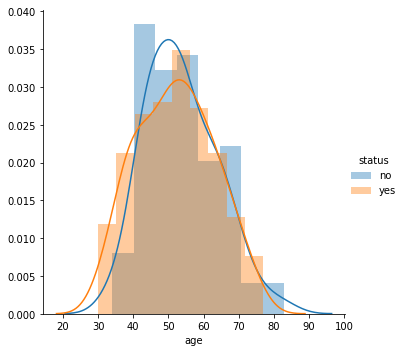

In [35]:
sns.FacetGrid(cancer_df, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


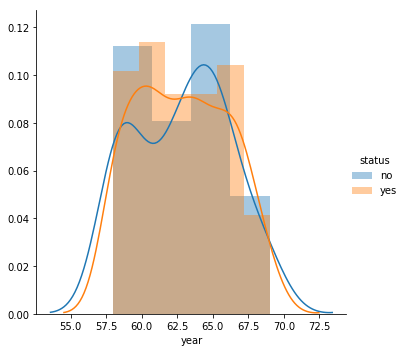

In [14]:
sns.FacetGrid(cancer_df, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


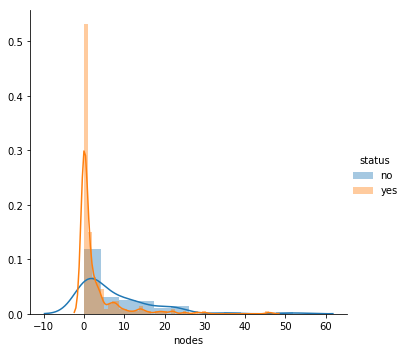

In [15]:
sns.FacetGrid(cancer_df, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

#Observations about univariate analysis(PDF)
The plots are overlapping for all the three features so it is difficult to seperate the two classes

# CDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


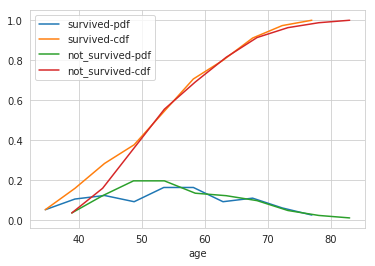

In [56]:
#Computing CDF for patients who have survived vs those who have not survived
#Against all the three features




counts, bin_edges = np.histogram(survived_patient['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="survived-pdf")
plt.plot(bin_edges[1:], cdf,label="survived-cdf")
plt.xlabel("age")
pyl.legend(loc='upper left')

# not survived
counts, bin_edges = np.histogram(not_survived_patient['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="not_survived-pdf")
plt.plot(bin_edges[1:], cdf,label="not_survived-cdf")
plt.xlabel("age")
pyl.legend(loc='upper left')




plt.show()







[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


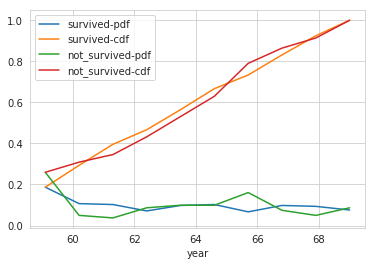

In [57]:
counts, bin_edges = np.histogram(survived_patient['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="survived-pdf")
plt.plot(bin_edges[1:], cdf,label="survived-cdf")
plt.xlabel("year")
pyl.legend(loc='upper left')

# not survived
counts, bin_edges = np.histogram(not_survived_patient['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="not_survived-pdf")
plt.plot(bin_edges[1:], cdf,label="not_survived-cdf")
plt.xlabel("year")
pyl.legend(loc='upper left')




plt.show()



plt.show()


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "center_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


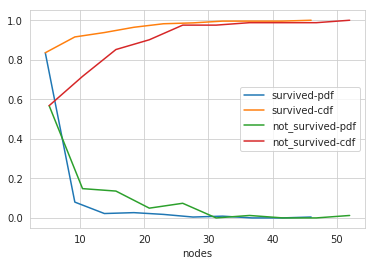

In [59]:
counts, bin_edges = np.histogram(survived_patient['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="survived-pdf")
plt.plot(bin_edges[1:], cdf,label="survived-cdf")
plt.xlabel("nodes")
pyl.legend(loc='upper left')

# not survived
counts, bin_edges = np.histogram(not_survived_patient['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="not_survived-pdf")
plt.plot(bin_edges[1:], cdf,label="not_survived-cdf")
plt.xlabel("nodes")
pyl.legend(loc='center_right')




plt.show()



plt.show()


#observations regarding CDF

The plots are overlapping in nature.Not possible to seperate them

#Boxplots

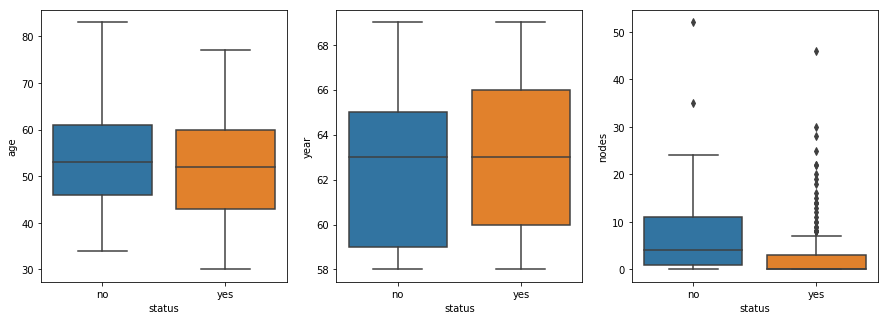

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    sns.boxplot( x='status', y=feature, data=cancer_df, ax=axes[idx])
plt.show() 

#Observations regarding boxplots

On the basis of age and year it is impossible to seperate the two classes but on basis of nodes they can be seperated using if-else conditions(error rate might be around 25%) also there are a a large number of exceptions for positive class

# Violin plots

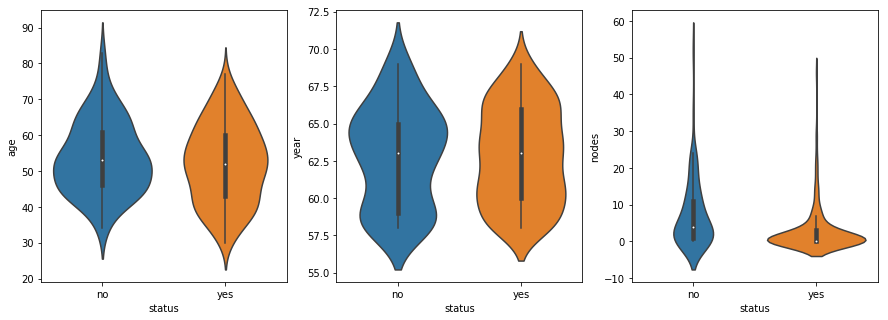

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=cancer_df, ax=axes[idx])
plt.show()


# Observations about violin plots

1.The number of  nodes of the survivors is highly densed from 0 to 5. 

2.Almost 80% of the patients have less than or equal to 5 positive lymph nodea. 

3.The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest. 

# Bivariate analysis involving (scatterplot and pairplots)

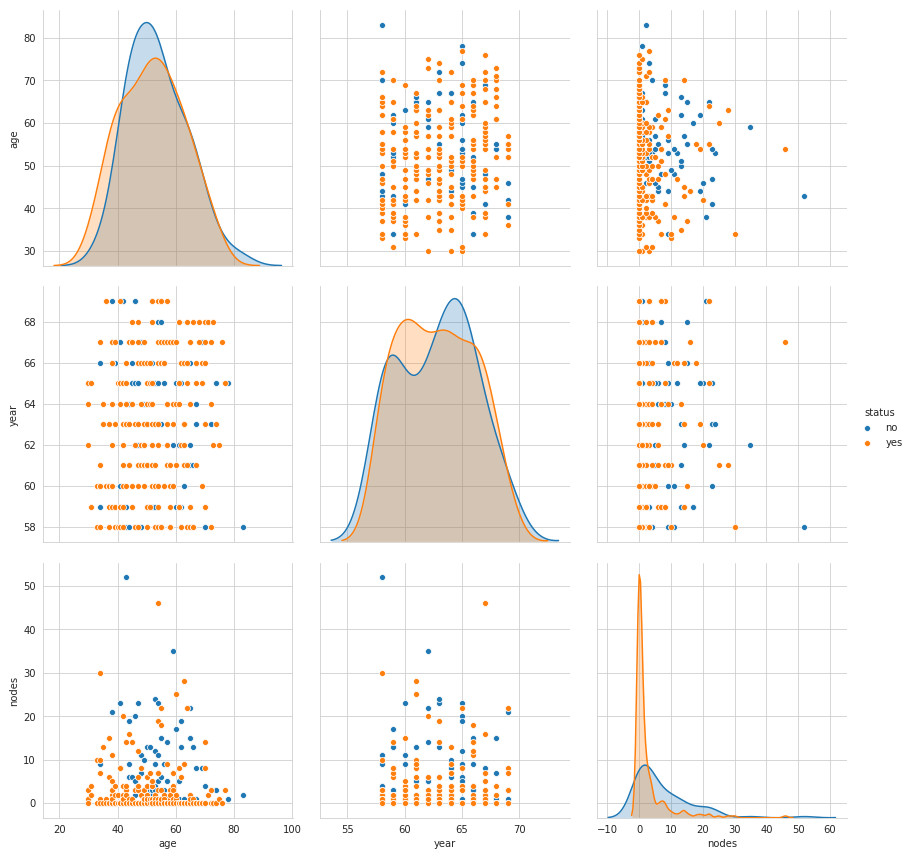

In [52]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer_df, hue="status", height=4);
plt.show()

#Observations about pairplots

The plot between years and nodes gives us better seperation between the classes than other plots

#Scatterplots

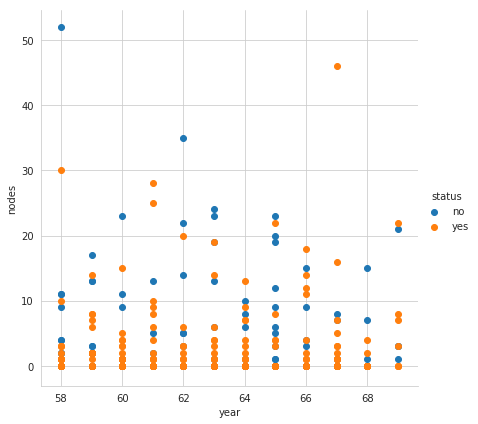

In [51]:
sns.set_style("whitegrid");
sns.FacetGrid(cancer_df, hue="status", height=6) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();

# final conclusions

1As far as univariate analysis is concerned ,it is not possible to seperate two classes on any one feature using PDF,CDF,boxplot or violin plots

2.Using Bivariate analysis involving pairplots we realize that years and nodes can be used to classify the two classes.They give better results than other features

3.We need more number of features to classify and diffrentiate between two classes